In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))


: /physical_device:CPU:0
: /physical_device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/Final_Arabic_Alpha_dataset.zip', 'r') as zipObj:
   zipObj.extractall('drive/MyDrive/Dataset')

In [ ]:
datasets = ['/content/drive/MyDrive/Dataset/Final_Arabic_Alpha_dataset/train',\
            '/content/drive/MyDrive/Dataset/Final_Arabic_Alpha_dataset/test',
           '/content/drive/MyDrive/Dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
IMAGE_SIZE = (160,160)
BATCH_SIZE = 512
SEED = 43
EPOCHS = 50

In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode='grayscale',
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [ ]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split = 0.2,
    label_mode="categorical",
    color_mode='grayscale',
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


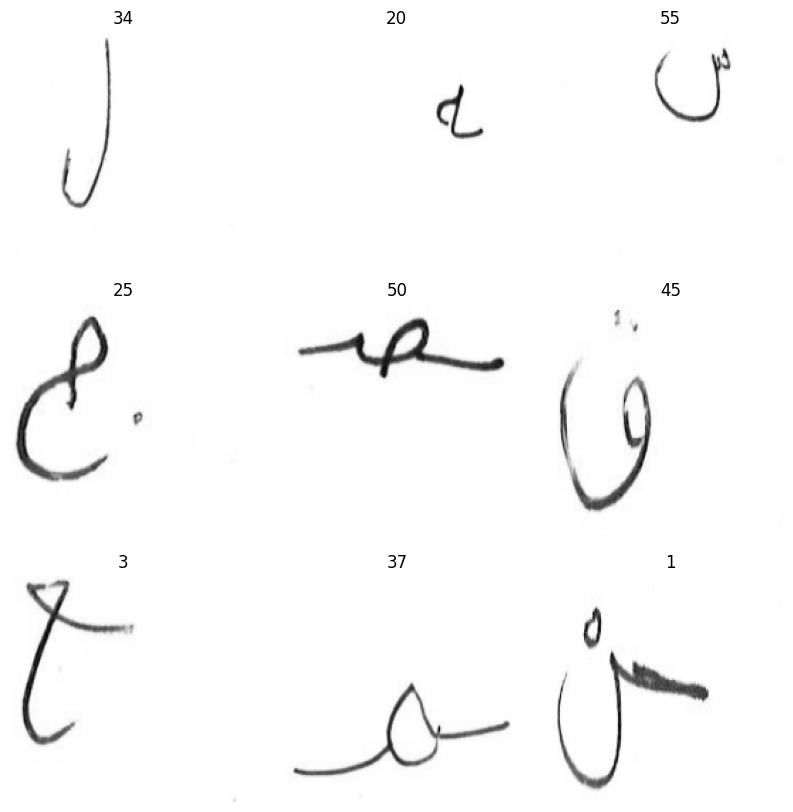

In [ ]:
class_names = train_images.class_names
plt.figure(figsize = (10, 10))
for images, labels in train_images.take(1): # It takes a small portion
# and shows the first 9 images
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
    plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
    plt.axis("off")

In [ ]:
for images, labels in train_images:
  print(images.shape)
  print(labels.shape)
  break

(512, 160, 160, 1)
(512, 65)




*   (Batch Size, Width, Height, 1 Image Tensor Channel (Greyscale))
*   (Batch Size, Number Of Classes)



# Model Definition:

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomRotation(0.1),

    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASS, activation='softmax')
])


# Model Summary

In [ ]:
model.build(input_shape= (BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (512, 160, 160, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (512, 160, 160, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (512, 160, 160, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (512, 160, 160, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (512, 80, 80, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (512, 80, 80, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (512, 40, 40, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (512, 40, 40, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (512, 20, 20, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (512, 20, 20, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (512, 10, 10, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (512, 10, 10, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (512, 5, 5, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (512, 6400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (512, 1024)                 │       6,554,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (512, 1024)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (512, 65)                   │          66,625 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,046,017 (26.88 MB)

 Trainable params: 7,046,017 (26.88 MB)

 Non-trainable params: 0 (0.00 B)

# Model Optimization

In [ ]:
learning_rate = 0.001
lr_mod = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_mod),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training the Model

In [ ]:
h1 = model.fit(train_images,
               validation_data=train_validation,
               epochs=EPOCHS)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.0155 - loss: 4.1776 - val_accuracy: 0.0197 - val_loss: 4.1700
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.0274 - loss: 4.1310 - val_accuracy: 0.1211 - val_loss: 3.5095
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.1293 - loss: 3.4082 - val_accuracy: 0.3977 - val_loss: 2.0943
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.3416 - loss: 2.3646 - val_accuracy: 0.5690 - val_loss: 1.4517
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.4838 - loss: 1.7521 - val_accuracy: 0.6785 - val_loss: 1.0351
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.5868 - loss: 1.3701 - val_accuracy: 0.7501 - val_loss: 0.8266
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.6562 - loss: 1.1234 - val_accuracy: 0.7645 - val_loss: 0.7554
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6993 - loss: 0.9704 - val_accuracy: 0.8012 - v

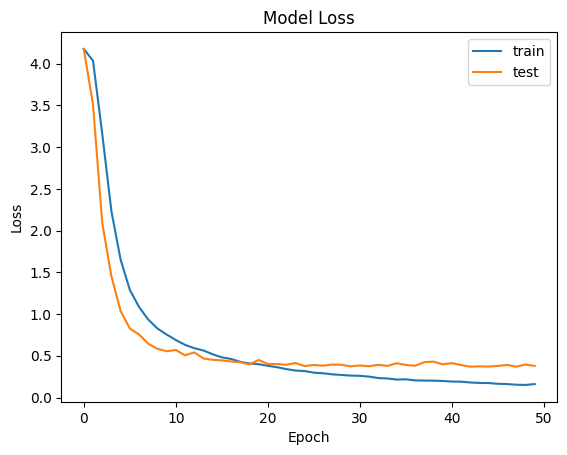

In [ ]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

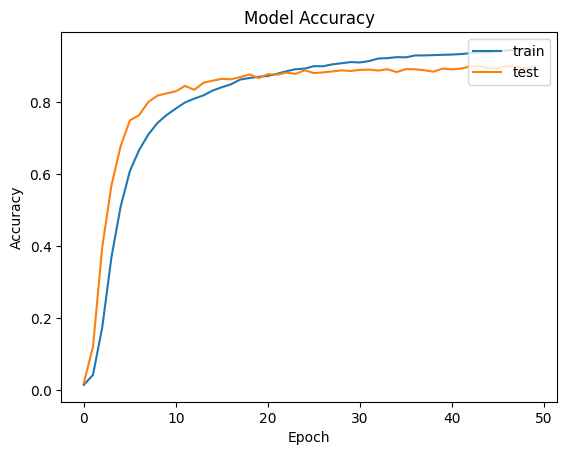

In [ ]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_images = tf.keras.utils.image_dataset_from_directory(
    datasets[1],
    labels = None,
    label_mode="categorical",
    color_mode='grayscale',
    shuffle= False,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 10640 files.


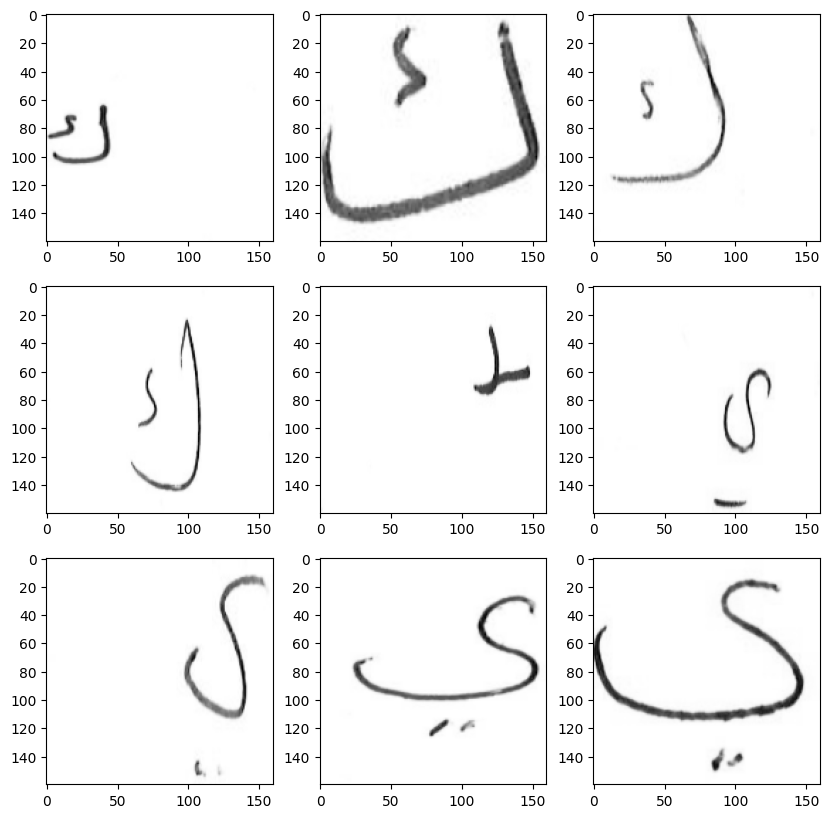

In [ ]:
plt.figure(figsize= (10, 10))
for images in test_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)


In [ ]:
for images in test_images:
  print(images.shape)
  break

(512, 160, 160, 1)


In [ ]:
predictions = model.predict(test_images)

21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step


In [ ]:
img_list = os.listdir(datasets[1])

In [ ]:
labels_list = sorted(os.listdir(datasets[0]))
print(labels_list)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [ ]:
predictions[1][22]

0.9970778